# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

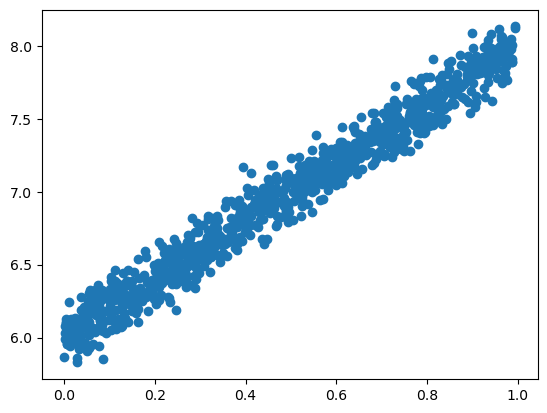

In [61]:
#generating sample dataset (1000 count); w,b=2,6
def gen_approx_linear_data(N=1000,w=2,b=6,s=0.25,min_x=0,max_x=1):
    x=(max_x-min_x)*np.random.random(N)+min_x
    return x,np.random.normal(0.,s,N)+w*x+b #when calculating y value, add s noise

#using function to create dataset
x,y=gen_approx_linear_data(s=0.1)

#scatter plot (x vs y)
plt.scatter(x,y)

(array([  4.,  45., 105., 199., 283., 199., 103.,  53.,   8.,   1.]),
 array([-0.31351674, -0.24441527, -0.1753138 , -0.10621233, -0.03711086,
         0.03199061,  0.10109207,  0.17019354,  0.23929501,  0.30839648,
         0.37749795]),
 <BarContainer object of 10 artists>)

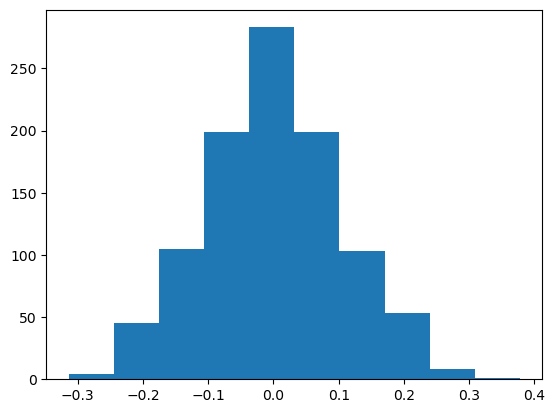

In [62]:
#histogram of y-mx+b; w,b=2,6
plt.hist(y-(2*x+6))

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [63]:
#y=wx+b w/o np
def model_loop(x,w,b):
    y=[w*x[i]+b for i in range(len(x))]
    return y

#y=wx+b w/ np
def model_np(x,w,b):
    x=np.array(x)
    y=w*x+b
    return y


In [64]:
#showing functions give identical output (using small number of x values for ease)
q2=[1,2,3,4,5]
y_loop=model_loop(q2,2,6)
y_np=model_np(q2,2,6)

#showing outputs are identical
print(y_loop)
print(y_np)

[8, 10, 12, 14, 16]
[ 8 10 12 14 16]


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

Text(313.14267676767673, 0.5, 'wx+b')

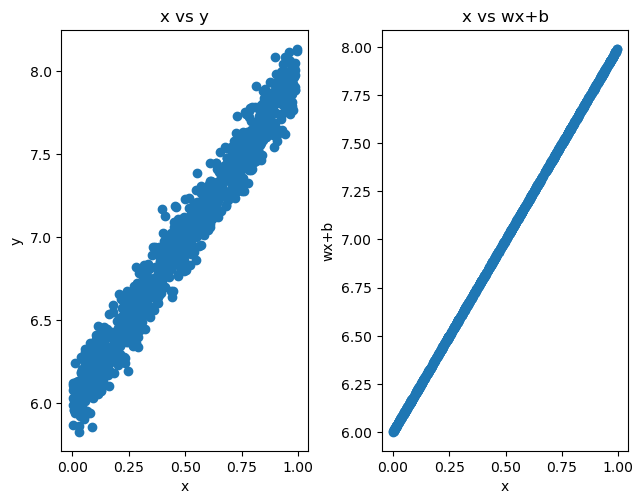

In [65]:
#calculating wx+b using function from Q2
wxb=model_np(x,2,6)

#plots
fig,ax=plt.subplots(1,2)
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

ax[0].scatter(x,y)
ax[0].set_title('x vs y')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x,wxb)
ax[1].set_title('x vs wx+b')
ax[1].set_xlabel('x')
ax[1].set_ylabel('wx+b')


4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


In [41]:
#cost function (mean square error)
def cost(x,y,w,b):
    #use function to calculate y-hat
    y_hat=model_np(x,w,b)

    #calculating J(w,b); cost function
    y=np.array(y) #make sure y is an array
    j=sum((y_hat-y)**2)/(2*len(x))

    return j


Text(313.14267676767673, 0.5, 'Cost')

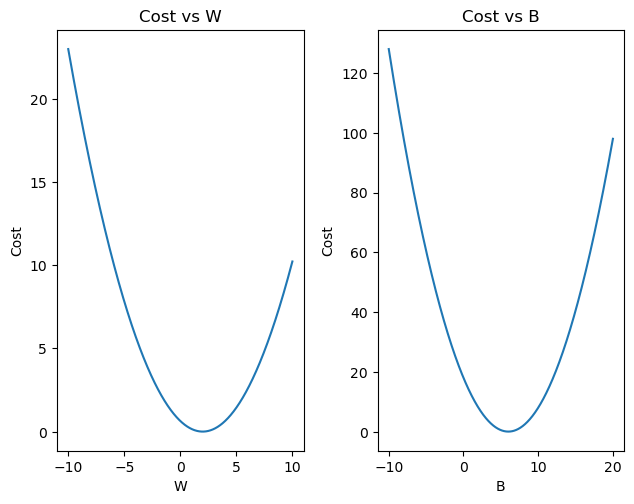

In [66]:
#holding b constant
Ws=np.linspace(-10,10,1000)
costs1=[cost(x,y,weight,6) for weight in Ws]

#holding w constant
Bs=np.linspace(-10,20,1000)
costs2=[cost(x,y,2,intercept) for intercept in Bs]

#plots
fig,ax=plt.subplots(1,2)
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

ax[0].plot(Ws, costs1) #plot cost vs w
ax[0].set_title('Cost vs W')
ax[0].set_xlabel('W')
ax[0].set_ylabel('Cost')

ax[1].plot(Bs, costs2) #plot cost v b
ax[1].set_title('Cost vs B')
ax[1].set_xlabel('B')
ax[1].set_ylabel('Cost')

5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

In [48]:
#gradient descent
def gradient(x,y,w,b):
    #cost function to get J(w,b)
    jwb=cost(x,y,w,b)
    
    #calculating dj_dw
    dj_dw=sum((w*x+b-y)*x)/len(x)

    #calculating dj_db
    dj_db=sum(w*x+b-y)/len(x)

    return dj_dw, dj_db

In [117]:
#gradients while holding either w or b constant; resuse Ws and Bs from previous question
gradientw=[]
for weight in Ws:
    grw=gradient(x,y,weight,6)[0]
    gradientw.append(grw)
    if grw>0: #stopping gradient when value passes over 0
        break

gradientb=[]
for intercept in Bs:
    grb=gradient(x,y,2,intercept)[1]
    gradientb.append(grb)
    if grb>0: #stopping gradient when value passes over 0
        break

#cutting Ws/Bs list of values to match gradient list
gradw_len=len(gradientw)
new_Ws=Ws[:gradw_len]

gradb_len=len(gradientb)
new_Bs=Bs[:gradb_len]

Text(313.14267676767673, 0.5, 'Gradient')

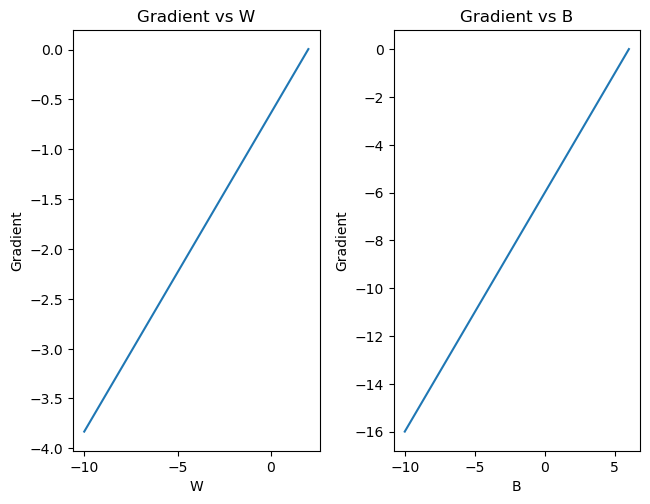

In [118]:
#gradients while holding either w or b constant; resuse Ws and Bs from previous question
#gradientw=[gradient(x,y,weight,6)[0] for weight in Ws] #[0] = dj_dw
#gradientb=[gradient(x,y,2,intercept)[1] for intercept in Bs] #[1] = dj_db

#plots
fig,ax=plt.subplots(1,2)
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

ax[0].plot(new_Ws, gradientw) #plot gradient vs w
ax[0].set_title('Gradient vs W')
ax[0].set_xlabel('W')
ax[0].set_ylabel('Gradient')

ax[1].plot(new_Bs, gradientb) #plot gradient v b
ax[1].set_title('Gradient vs B')
ax[1].set_xlabel('B')
ax[1].set_ylabel('Gradient')

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [57]:
import copy
import math

In [58]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

In [59]:
#using gradient descent function to fit a line to data
slope, interc, j_hist, p_hist = gradient_descent(x,y,-10,-10,0.2,1000,cost,gradient)

Iteration    0: Cost 1.39e+02  dj_dw: -1.223e+01, dj_db: -2.210e+01   w: -7.554e+00, b:-5.58027e+00
Iteration  100: Cost 2.47e-02  dj_dw: -4.502e-02, dj_db:  2.447e-02   w:  1.326e+00, b: 6.36480e+00
Iteration  200: Cost 6.37e-03  dj_dw: -1.221e-02, dj_db:  6.638e-03   w:  1.825e+00, b: 6.09318e+00
Iteration  300: Cost 5.03e-03  dj_dw: -3.312e-03, dj_db:  1.801e-03   w:  1.961e+00, b: 6.01951e+00
Iteration  400: Cost 4.93e-03  dj_dw: -8.985e-04, dj_db:  4.884e-04   w:  1.998e+00, b: 5.99952e+00
Iteration  500: Cost 4.92e-03  dj_dw: -2.437e-04, dj_db:  1.325e-04   w:  2.008e+00, b: 5.99410e+00
Iteration  600: Cost 4.92e-03  dj_dw: -6.611e-05, dj_db:  3.594e-05   w:  2.010e+00, b: 5.99263e+00
Iteration  700: Cost 4.92e-03  dj_dw: -1.793e-05, dj_db:  9.748e-06   w:  2.011e+00, b: 5.99223e+00
Iteration  800: Cost 4.92e-03  dj_dw: -4.864e-06, dj_db:  2.644e-06   w:  2.011e+00, b: 5.99213e+00
Iteration  900: Cost 4.92e-03  dj_dw: -1.319e-06, dj_db:  7.172e-07   w:  2.011e+00, b: 5.99210e+00


7. Plot the cost and parameters versus iteration of gradient descent.

Text(62.597222222222214, 0.5, 'B')

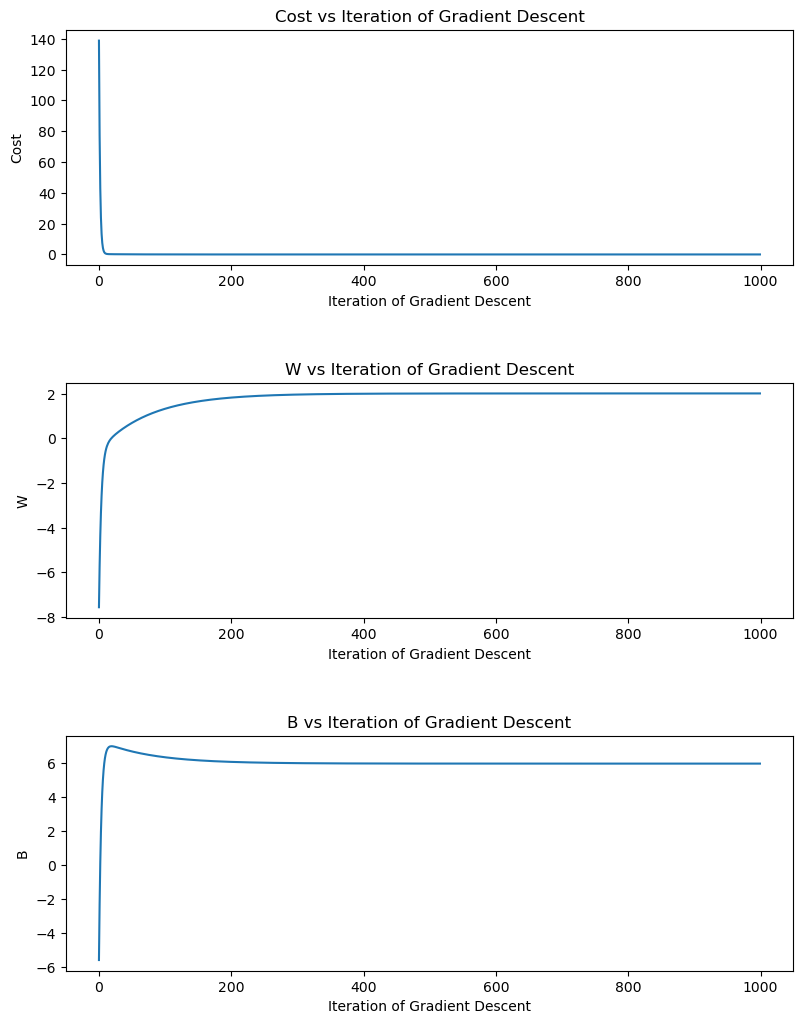

In [91]:
#plots
fig,ax=plt.subplots(3,1, figsize=(8,10))
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)

ax[0].plot(j_hist) #plot cost vs iteration of gradient descent
ax[0].set_title('Cost vs Iteration of Gradient Descent')
ax[0].set_xlabel('Iteration of Gradient Descent')
ax[0].set_ylabel('Cost')

ax[1].plot(range(len(p_hist)),[p_hist[i][0] for i in range(len(p_hist))]) #plot w vs iteration of gradient descent
ax[1].set_title('W vs Iteration of Gradient Descent')
ax[1].set_xlabel('Iteration of Gradient Descent')
ax[1].set_ylabel('W')

ax[2].plot(range(len(p_hist)),[p_hist[j][1] for j in range(len(p_hist))]) #plot b vs iteration of gradient descent
ax[2].set_title('B vs Iteration of Gradient Descent')
ax[2].set_xlabel('Iteration of Gradient Descent')
ax[2].set_ylabel('B')
